<div class="alert">  
    <center><h1><strong>Final Project: NLP Fake news detection</strong></h1></center>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Analysis / exploration of the data set</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
<ul>
    <li>Analyze the chosen dataset and its properties</li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://www.cs.ucsb.edu/~william/data/liar_dataset">https://www.cs.ucsb.edu/~william/data/liar_dataset</a>
   
</div>

In [12]:
#Importing the required libraries

import numpy as np
import pandas as pd

## 1. Loading the dataset

In [13]:
# Here we are loading th dataset into a pandas dataframe we can do further analysis on it
df = pd.read_csv("datasets/Liar_Dataset.csv")

# We are also going to look at the first 5 records in it so to have an idead on what we are working with
df.head(5)

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


## 2. Exploring the dataset

In [14]:
# Let us first take a look at what we are dealing with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   [ID].json             12787 non-null  object
 1   label                 12787 non-null  object
 2   statement             12787 non-null  object
 3   subject(s)            12787 non-null  object
 4   speaker               12787 non-null  object
 5   speaker's job title   9222 non-null   object
 6   state info            10040 non-null  object
 7   party affiliation     12787 non-null  object
 8   barely true counts    12787 non-null  int64 
 9   false counts          12787 non-null  int64 
 10  half true counts      12787 non-null  int64 
 11  mostly true counts    12787 non-null  int64 
 12  pants on fire counts  12787 non-null  int64 
 13  venue                 12658 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.4+ MB


<div class="alert alert-block alert-warning">  
<b>In the above we can point a few things about the dataset</b> 
<hr>
<ul>
    <li>1. It has 14 columns and 12787 rows</li>
    <li>2. It has two datatypes: objects (strings) and int64 (numbers) </li>
    <li>3. The first column - which seems to be some kind of ID - is actually a string. And we can see by looking at the data inside the CSV looks like the filename.</li>
    <li>4. We can also notice here that we have a few nulls, as for some columns (such as) 'speaker's job title ', 'state info' and 'venue' the Non-Null Counts are lower than the number of rows. </li>
</ul>
</div>

In [15]:
# Now take a look at the columns inside the dataset so to have an idea about the features we can use further in our model
df.columns

Index(['[ID].json', 'label', 'statement', 'subject(s)', 'speaker',
       'speaker's job title', 'state info', 'party affiliation',
       'barely true counts', 'false counts', 'half true counts',
       'mostly true counts', 'pants on fire counts', 'venue'],
      dtype='object')

TODO: Understand more about the columns and complete where we have ???
Look into PAPER and fact checking websites (politifact)
<div class="alert alert-block alert-warning">  
<b>Further description by matching the columns with the rows</b> 
<hr>
<ul>
    <li>1. '[ID].json' - As already stated, this seems to be a filename. This may not be an useful feature for us to use so we may delete it in the future.</li>
    <li>2. 'label' -  This column is the classification of the news statement, it can be either TRUE, FALSE, half-true, half-false or pants-fire.</li>
    <li>3. 'statement' - This represents the text in the news article. </li>
    <li>3. 'subject(s)' -   The subjects that the news statement talks about. We will further analyze what are them below. </li>
    <li>3. 'speaker' -  The person who talked/wrote about the news statement.  We will further analyze what are them below. </li>
    <li>4. 'speakers job title' -  The speaker's job.  We will further analyze what are them below. </li>
    <li>5. 'state info' -  ???</li>
    <li>7. 'party affiliation' - The political party the speaker is related to. </li>
    <li>8. 'barely true counts' - The counts of statements that are classified as being barely true. Meaning ??? </li>
    <li>9. 'false counts' - The counts of statements that are classified as being barely false </li>
    <li>10. 'half true counts' -  The counts of statements that are classified as being half true. Meaning ??? </li>
    <li>11. 'mostly true counts' -  The counts of statements that are classified as being mostly true. Meaning ??? </li>
    <li>12. 'pants on fire counts' -  The counts of statements that are classified as being pants on fire. Meaning ??? </li>
    <li>13. 'venue' -  ??? </li>
</ul>
</div>

## 3. Cleaning the data

In [16]:
# We already noticed above that we have some null values. Now let us confirm how many and in which columns
df.isnull().sum()

[ID].json                  0
label                      0
statement                  0
subject(s)                 0
speaker                    0
speaker's job title     3565
state info              2747
party affiliation          0
barely true counts         0
false counts               0
half true counts           0
mostly true counts         0
pants on fire counts       0
venue                    129
dtype: int64

In [17]:
np.sum(df.isnull().any(axis=1))

4351

TODO: Understand more about the columns and complete where we have ???
Look into PAPER and fact checking websites (politifact)
<div class="alert alert-block alert-warning">  
<b>In the above we can see that:</b> 
<hr>
<ul>
    <li>1. We have 3565 nulls in the speaker's job title column, 2747 nulls in the state info column, and 129 nulls in the venue column.</li>
    <li>2. In total we have 4351 nulls</li>
    <li>3. We can also see by analysing the rows that we have two kids of nulls when the value is missing: NaN and tje np.nan return type.</li>
</ul>
<h3>Below we will apply some strategies to clean these nulls in order to not mess with our analysis.</h3>
</div>

In [18]:
# TODO: Maybe change the strategy
# Here we are re replacing the rows with NaN (null) values with a blank space
df.replace('', np.nan, inplace=True)

# Now we are going to replace the np.nan values for all the three columns we are cleaning
df["speaker's job title"]= df["speaker's job title"].replace(np.nan, 'Unknown')
df['venue']= df['venue'].replace(np.nan, 'Unknown')
df["state info"]= df["state info"].replace(np.nan, 'Unknown')

In [19]:
# Now let us check again if we were able to completely remove the nulls
df.isnull().sum()

[ID].json               0
label                   0
statement               0
subject(s)              0
speaker                 0
speaker's job title     0
state info              0
party affiliation       0
barely true counts      0
false counts            0
half true counts        0
mostly true counts      0
pants on fire counts    0
venue                   0
dtype: int64

In [20]:
# TODO: Fix
# We can also remove th [ID].json column, since it is not useful to us
# df.drop(columns=['[ID].json'], axis=1, inplace=True)

## 4. Data visualization on the rows

<div class="alert alert-block alert-warning">  
<b>Below we are going to try to understand more about the rows we have so to start reasoning about which information we have in them and which of them we can use later to extract the features for our Machine Learning models.</b> 
<hr>
</div>

In [45]:
# TODO: Fix helper functions and add more visualizations

# Defining some helper functions and variables for generating the visualizations using matplotlib, wordcloud and seaborn
from matplotlib import pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns

number_of_elements_to_display = 10


# Plots a pie graph based on a specific column
def plot_pie(column, number_of_values):
    df[column].value_counts().head(number_of_values).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

def plot_bar(column, number_of_values):
    df[column].value_counts().value_counts().head(number_of_values).plot(x='lab', y='val', rot=0)

# TODO: Fix because we need a way to show the data correlation between different columns.
# Plots a wordcloud based on the relationship between two columns
## column: 
## value:
## word:
# def plot_wordcloud(column, value, word):
#     data1=df[df[column]==value]
#     d =data1[word]
#     string_ = []
#     for t in d:
#         string_.append(t)
#     string_ = pd.Series(string_).map(str)
#     string_=str(string_)
#     wc = WordCloud(width=1500, height=700,max_font_size=250, background_color ='white').generate(string_)
#     plt.figure(figsize=(12,10))
#     plt.imshow(wc)
#     plt.axis("off")
#     plt.show()

# TODO: Not working because too many words
# def plot_distribution_graph(column):
#     sns.countplot(data= df, x = column)
#     plt.show()

# plot_distribution_graph('subject(s)')

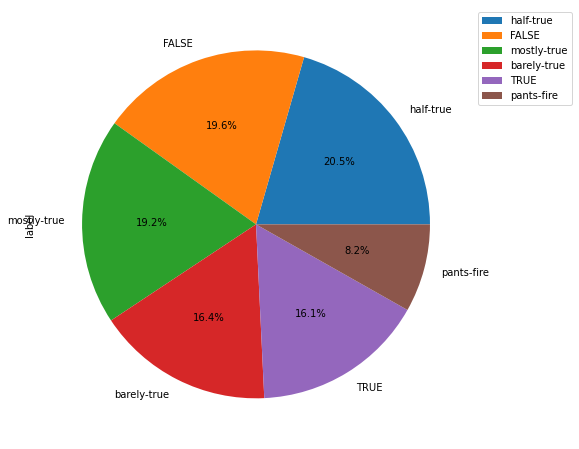

In [55]:
# Plotting a pie graph based on the label column
plot_pie('label', number_of_elements_to_display)

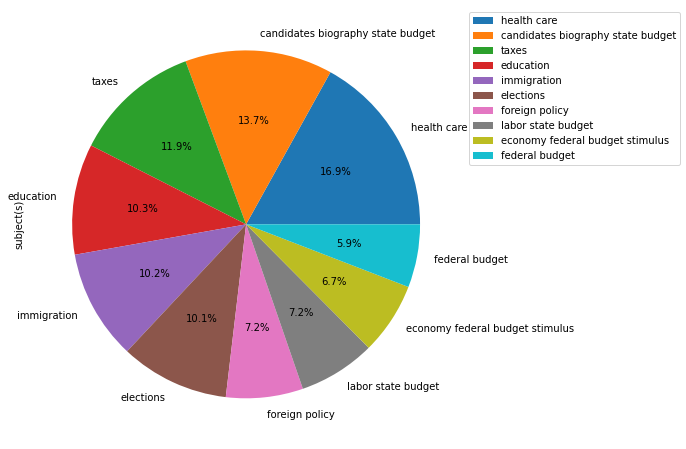

In [54]:
# Plotting a pie graph based on the subjects column
plot_pie('subject(s)', number_of_elements_to_display)

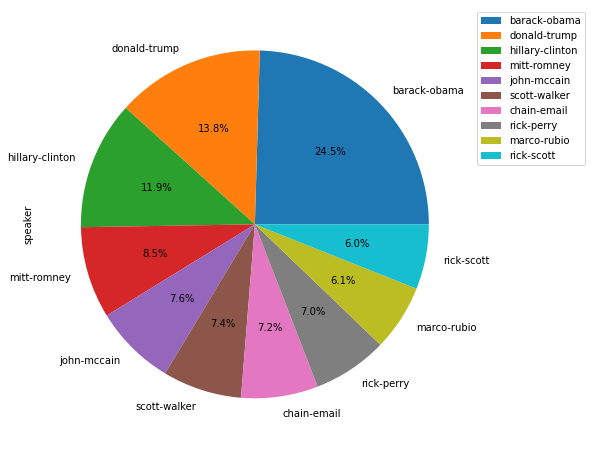

In [53]:
# Plotting a pie graph based on the subjects speakers
plot_pie('speaker', number_of_elements_to_display)

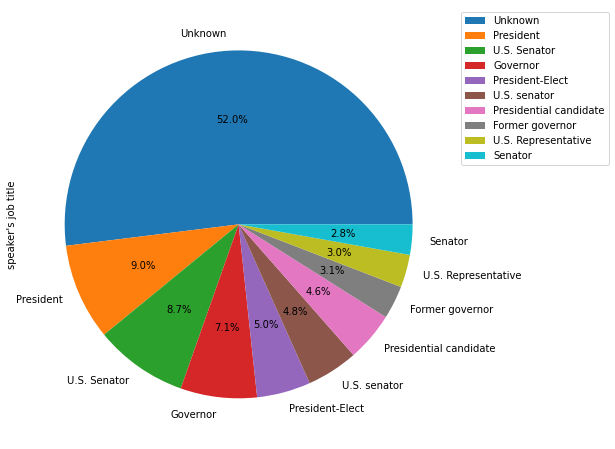

In [52]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("speaker's job title", number_of_elements_to_display)

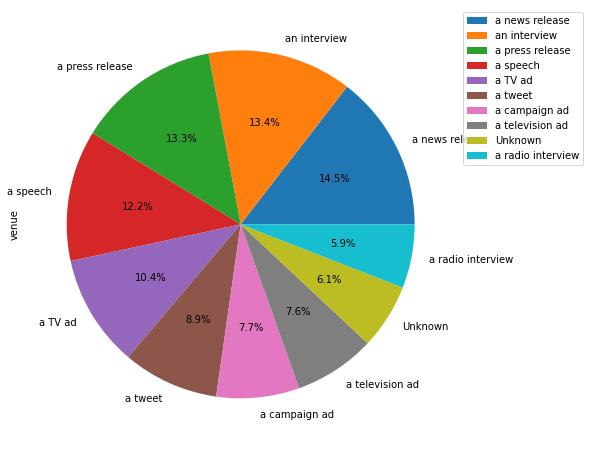

In [51]:
# Plotting a pie graph based on the venue
plot_pie("venue", number_of_elements_to_display)

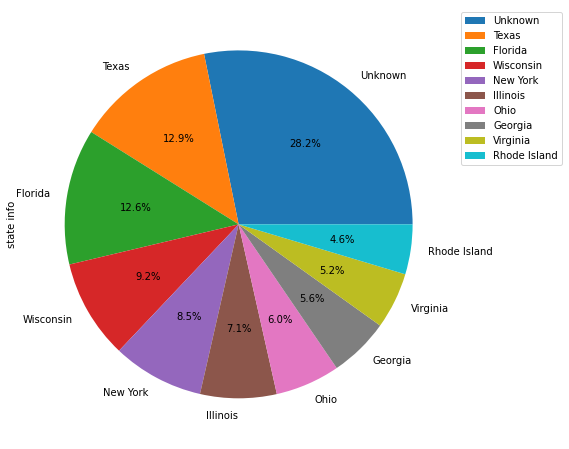

In [48]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("state info", number_of_elements_to_display)

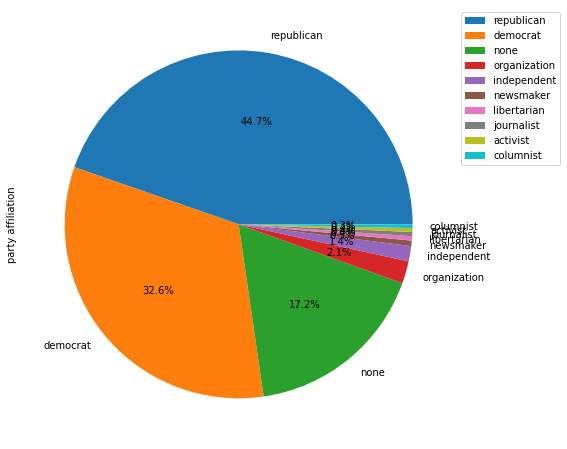

In [47]:
# Plotting a pie graph based on the speaker's job title column
plot_pie("party affiliation", number_of_elements_to_display)

<div class="alert alert-block alert-warning">  
 <b>TODO: Switch to top 10 and rewrite the conclusions.</b>
<b>Based on the above pie charts we can already draw some interesting conclusions:</b> 
<hr>
<ul>
<li>1. For the <b>'label'</b> column, which defines the category to which the news articles belong to, we can see that our dataset contains mostly half-true statements (19.6% of the overall). On the opposite, lower end we have 8.2% pants-fire statements. </li>
<li>2. As for the subjects in the dataset, we see 7 of them, being (in order of distribution of statements, from higher to lower):
 a. Health-care
 b. education
 c. elections
 d. immigration
 c. candidates-biography
 d. economy </li>
<li>3. As for the <b>job titles</b> of the speakers in the dataset (the person who wrote/spoke the news article) we have them being:
 a. Unknown - the articles we had no data for speaker
 b. President
 c. U.S. Senator
 d. Governor
 e. President-Elect (This is a duplicate, we will deal with it in the future)
 f. U.S. Senator (This is a duplicate, we will deal with it in the future)
 e. Presidential Candidate </li>
<li>
4. As per the <b>venue</b> column, meaning the source of the news article, we have:
 a. 18% of them come from a news release.
 b. 16.7% of them come from an interview.
 c. 16.5 come from a press release.
 d. 15.1% of them come from a speech.
 e. 13.0% come from a TV ad.
 f. 11.1% of them come from a tweet.
 e. 9.6% of them come from a campaign ad.</li>
<li>
5. As per the <b>state info</b> where the news was released, we have:
 a. Unknown
 b. Texas
 c. Florida
 d. Wisconsin
 e. New York
 f. Illinois
 g. Ohio</li>
<li>
6. And at last, for the <b>party affiliation</b> we have:
 a. 45%.2 of the political parties affiliated to the news articles are republicans.
 b. We have also a big number of articles affiliated with democrats and 17.$ are unknowns.
 c. We have also a small number of articles being related to no party affiliations, libertarians, a few of them being independent, affiliated to organizations or newsmakers.
</li>
</ul>
</div>

In [28]:
# TODO: Correlate the columns above with the categories of news with wordclouds or distribution graphs.

## 5. Preparing the data

<div class="alert alert-block alert-warning">  
<b>Below we are going to prepare the features we are going to use with a few techniques in order to prepare the data so that we can further fit our model into it.</b>

<ul>
<li>1. We will remove the stopwords for the news statements, so to not overfit our model due to these words not being useful for us.</li>
<li>2. We will remove special characters.</li>
<li>3. We will gather and remove words that are repeated.</li>
<li>4. We will transform the string texts in tokens (tokenization) so that we can later vectorize them so to fit our model.</li>
<li>5. We will apply stemming to the words in the words so to remove common suffixes from the end of word tokens.</li>
</li>6. At last we will apply lemmatization to ensure that the output word is an existing normalized word.</li>
</ul>
<hr>
</div>

### 5.1 Preparing the statement column

In [29]:
# Let us first define some helper functions that will allow us to prepare the data
import re
from nltk.corpus import stopwords
from collections import OrderedDict
from nltk.tokenize import word_tokenize
from nltk import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer

''' 
Removes stopwords that are included in the english stopwords corpus.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_stopwords(column):
    stopwords_list = stopwords.words('english')
    return column.apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_list)]))


''' 
Removes all the ASCII code special characters !@#$%^&*()_+{}/ from each row in the dataframe column.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_special_characters(column):
    # Using regex to remove every non word character
    return column.map(lambda x: re.sub(r'\W+', ' ', x))


''' 
Removes duplicated words in the dataframe column.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def remove_repeated_words(column):
    ''' 
    Adds all the words in a string sentence as unique words in a set.
    
    Parameters:
    - text(String): A string value representing the sentence to be processed
    
    Returns:
    - text(String): The processed sentence
    '''
    def remove_duplicates(text):
        words = text.split()
        seen = set()
        unique_words = []
        for word in words:
            if word not in seen:
                unique_words.append(word)
                seen.add(word)
        return ' '.join(unique_words)

    return column.apply(remove_duplicates)


''' 
Tokenizes the words in the rows belonging to the dataframe column using word_tokenize. 

Parameters:
- column(pd.Dataframe): The dataframe column to be processed

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def tokenize(column):
    return column.apply(word_tokenize)


''' 
Applies stemming to the rows belonging to the dataframe column using the Porter Stemmer technique.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def apply_stemming(column):
    stemmer = PorterStemmer()
    return column.apply(lambda x : [stemmer.stem(y) for y in x])

''' 
Applies lemmatization to the rows belonging to the dataframe column. using WordNetLemmatizer

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def apply_lemmatization(column):
    lemmatizer = WordNetLemmatizer()

    def lemmatize_text(text):
        if isinstance(text, str):
            words = word_tokenize(text)
            lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
            return ' '.join(lemmatized_words)
        else:
            return text

    return column.apply(lemmatize_text)
    
# Uncomment the below for debugging
# # df["statement"] = remove_stopwords(df["statement"])
# # df["statement"] = remove_special_characters(df["statement"])
# # df["statement"] = remove_repeated_words(df["statement"])
# # df["statement"] = tokenize(df["statement"])
# # df["statement"] = apply_stemming(df["statement"])
# # df["statement"] = apply_lemmatization(df["statement"])
# # df["statement"].head()

In [30]:
# Preparing the statement column

# Uncomment the below for debugging
# df = pd.read_csv("datasets/Liar_Dataset.csv")

df["statement"] = remove_stopwords(df["statement"])
df["statement"] = remove_special_characters(df["statement"])
df["statement"] = remove_repeated_words(df["statement"])
df["statement"] = tokenize(df["statement"])
df["statement"] = apply_stemming(df["statement"])
df["statement"] = apply_lemmatization(df["statement"])
df["statement"].head(5)

0    [build, wall, U, S, mexico, border, take, lite...
1       [wisconsin, pace, doubl, number, layoff, year]
2           [say, john, mccain, done, noth, help, vet]
3    [suzann, bonamici, support, plan, cut, choic, ...
4    [when, ask, report, whether, he, center, crimi...
Name: statement, dtype: object

### 5.2. Preparing the subject(s) column

In [31]:
# Let us define some helper functions to allow us to prepare the subject(s) column
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import pandas as pd
from fuzzywuzzy import fuzz

''' 
Uses the fuzzywuzy library to group similar words together on a similarity threshold.

Parameters:
- column(pd.Dataframe): The dataframe column to be processed 

Returns:
- column(pd.Dataframe): The processed dataframe column
'''
def group_by_similar_lists(column, threshold=80):
    unique_values = column.dropna().unique()
    groups = {}

    # Convert list of strings to a single string for comparison
    def list_to_string(lst):
        return ''.join(lst)

    # Iterate through each unique value (list of strings) and assign it to a group
    for value in unique_values:
        found_group = False
        str_value = list_to_string(value)
        
        for group in groups:
            # If the value is similar to the representative value of the group, add it to the group
            if fuzz.ratio(str_value, group) > threshold:
                groups[group].append(value)
                found_group = True
                break
        
        # If no similar group was found, create a new group
        if not found_group:
            groups[str_value] = [value]

    # Map each original value to its corresponding group
    def map_to_group(value):
        str_value = list_to_string(value)
        for group, group_values in groups.items():
            if any(fuzz.ratio(str_value, list_to_string(existing_value)) > threshold for existing_value in group_values):
                return group
        return str_value

    return column.apply(map_to_group)

In [32]:
# Uncomment the below for debugging. Do not forget to comment again so to not mess with our data samples!
# df = pd.read_csv("datasets/Liar_Dataset.csv")

df["subject(s)"] = remove_stopwords(df["subject(s)"])
df["subject(s)"] = remove_special_characters(df["subject(s)"])
df["subject(s)"] = remove_repeated_words(df["subject(s)"])
# df["subject(s)"] = tokenize(df["subject(s)"])

df["subject(s)"].value_counts()

health care                                        474
taxes                                              356
education                                          309
elections                                          304
immigration                                        303
                                                  ... 
agriculture veterans                                 1
bush administration job accomplishments pundits      1
health care medicare social security                 1
ethics health care public state budget finances      1
candidates biography infrastructure                  1
Name: subject(s), Length: 4533, dtype: int64

In [33]:
# By checking the above, we can see that after removing the stopwords, special characters and repeated words from each row in the subject(s) column we are left with
# 4533 unique values. Let us try to group similar values so to not overfit our model with unneeded information.

df["subject(s)"] = group_by_similar_lists(df["subject(s)"])

df["subject(s)"].value_counts()

health care                                                 509
candidates biography state budget                           412
taxes                                                       356
education                                                   309
immigration                                                 307
                                                           ... 
environment housing states weather                            1
crime poverty                                                 1
children education health care jobs urban                     1
consumer safety housing                                       1
climate change corporations energy environment oil spill      1
Name: subject(s), Length: 1814, dtype: int64

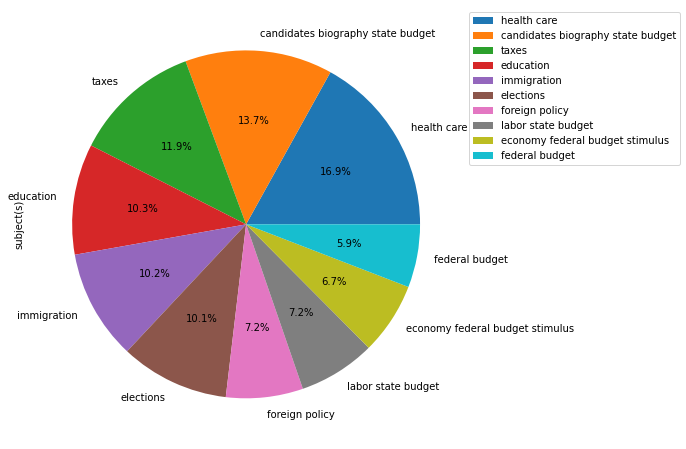

In [34]:
# now let us plot the top 10 values in our subject(s) list
plot_pie("subject(s)", 10)

### 5.3 Preparing the speaker column

In [57]:
df['speaker'].value_counts()

barack-obama                 611
donald-trump                 343
hillary-clinton              297
mitt-romney                  212
john-mccain                  189
                            ... 
mike-hymes                     1
dana-wachs                     1
amalgamated-transit-union      1
d-king                         1
sal-esquivel                   1
Name: speaker, Length: 3308, dtype: int64

In [58]:
df['speaker'] = remove_stopwords(df['speaker'])
df['speaker'] = remove_special_characters(df['speaker'])
df['speaker'] = remove_repeated_words(df['speaker'])
# df["subject(s)"] = tokenize(df["subject(s)"])

df['speaker'].value_counts()

barack obama                 611
donald trump                 343
hillary clinton              297
mitt romney                  212
john mccain                  189
                            ... 
mike hymes                     1
dana wachs                     1
amalgamated transit union      1
d king                         1
sal esquivel                   1
Name: speaker, Length: 3308, dtype: int64

In [60]:
df['speaker'] = group_by_similar_lists(df['speaker'])

df['speaker'].value_counts()

barack obama          611
donald trump          345
hillary clinton       338
mitt romney           212
john mccain           189
                     ... 
gun owners america      1
charles odimgbe         1
joseph levy             1
maria shriver           1
sal esquivel            1
Name: speaker, Length: 3120, dtype: int64

### 5.4 Preparing the speaker's job title column

In [65]:
df = pd.read_csv("datasets/Liar_Dataset.csv")

df["speaker's job title"].value_counts()

President                                                                615
U.S. Senator                                                             595
Governor                                                                 487
President-Elect                                                          343
U.S. senator                                                             328
                                                                        ... 
Associate director of the Rhode Island Division of Planning                1
Communications Director, Georgia Democratic Party                          1
Executive director of the National Alliance on Mental Illness in Ohio      1
Chief Justice, Supreme Court of Georgia                                    1
Director, Center for Higher Education, Texas Public Policy Foundation      1
Name: speaker's job title, Length: 1355, dtype: int64

In [121]:
# Helper functions for the speaker's job title

def tokenize_column(column):
    column = column.apply(str)
    tokens = []
    for word in column:
        tokens.append(word_tokenize(word))

    return tokens;

def remove_stopwords_from_speakers_job_title(speakers_job_title_list):
    return [
        [word for word in word_list if word.lower() not in stopwords.words('english')]
        for word_list in speakers_job_title_list
    ]

def apply_stemming_to_speakers_job_title(df, column_name, speakers_token):
    ps = PorterStemmer() 

    index = 0    
    for words in speakers_token:
    
        job=""
        for w in words: 
            job=job+ps.stem(w)+" "
        df.at[index, column_name] = job
        index += 1
    return df[column_name]

    
df = pd.read_csv("datasets/Liar_Dataset.csv")

speakers_token = tokenize_column(df["speaker's job title"])
speakers_token = remove_stopwords_from_speakers_job_title(speakers_token)

df["speaker's job title"] = apply_stemming_to_speakers_job_title(df, "speaker's job title", speakers_token)

df["speaker's job title"].head(10)

0                       governor 
1                   state repres 
2                president-elect 
3                        consult 
4                            nan 
5                            nan 
6    child educ advocaci organ . 
7            speaker hous repres 
8              congressman ny-18 
9                       governor 
Name: speaker's job title, dtype: object

In [68]:
# df["speaker's job title"] = remove_stopwords(df["speaker's job title"])
# df["speaker's job title"] = remove_special_characters(df["speaker's job title"])
# df["speaker's job title"] = remove_repeated_words(df["speaker's job title"])
# # df["subject(s)"] = tokenize(df["subject(s)"])

# df["speaker's job title"].value_counts()

In [ ]:
# df['speaker'] = group_by_similar_lists(df['speaker'])

# df['speaker'].value_counts()

<div class="alert alert-block alert-info">  
    <center><h2><strong>Identification of suitable features and implementation of a suitable feature extractor, e.f.
TfidfVectorizer</strong></h2></center>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Evaluation</strong></h2></center>

In [36]:
# TODO: Use Wikipedia pip module in order to evaluate the model precision